In [128]:
#Importing important libraries for this project

import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# Problem 1 Statement -
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [129]:
# Importing the wholesale customers dataset

Customerdata=pd.read_csv('Wholesale+Customers+Data.csv')
Customerdata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [130]:
Customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


The data has 440 instances with 9 attributes. 7 integer type, 0 float type and 2 object type(Strings in the column)

1.1 Use methods of descriptive statistics to summarize data. 
Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?


In [131]:
Customerdata.aggregate({"Region":['max','min']})

,Region
max,Other
min,Lisbon


In [132]:
Customerdata.aggregate({"Channel":['max','min']})

,Channel
max,Retail
min,Hotel


By using the aggregate funtion on channel and Region column Individually,With the help of discriptive statistics
- we were able to identify RETAIL channel and OTHER region from the data set spends more. 
- where as, HOTEL channel and LISBON region spend less.



1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [133]:
Customerdata.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


Data looks legit as all the statistics seem reasonable- Looking at the data, Buyer/Spender spends more of there annaul income in buying fresh items when compared to other 5 items accross stores.

However, inorder to determine the behaviour of varities accross region and channel, I have used coefficient of variables formula 
since this is the best approach to determine the variance by measuring the distibution of the products and the mean values were showing differences.
Upon doing that, I have found that the behavior is symmetric as the items COV value ranges in 1 to 1.85 ..Which is very minimal difference. Concluding that the varieties show similar behaviour across Region and Channel.


In [134]:
COV= Customerdata.std()/Customerdata.mean()
COV

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

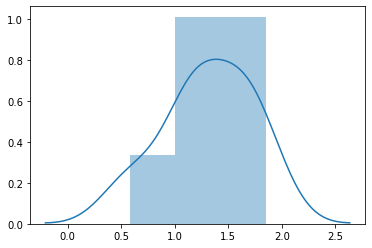

In [135]:
sns.distplot(COV)

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

Standard deviation is the best approach to determie the variabilty. 
Here, FRESH items are the most inconsistent and has high variation among other items in terms of price.
and DELICATESSEN are the least inconsistent.

1.4 Are there any outliers in the data?

To check the outliers, I have used boxplot keeping the 6 items on Y axis and region on X axis, where channel is the parameter.

1. Y=Milk, X=Region(Other, Lisbon, Oporto)
   * We can see extreme values in other regions for both the channels
   * Very few extreme values in Lisbon region 
   * No outlier in oporto region for retail
2. Y=Fresh , X=Region
   * Less extreme value in retail and extreme value in hotel for other region
   * Less extreme values for both the channels in Lisbon region
   * No outlier in Oporto region for Hotel channel
3. Y=Grocery, X=Region
    * Few extreme value in both the channels for other region
    * No outlier for retail channel and few extreme for hotel channel in Lisbon region
    * Very few extreme values in Oporto for both the channels
4. Y=Frozen, x=Region
    * Few extreme values in Lisbon and Oporto regions for both the channels
5. Y=Detergents_Paper, X=Region
    * Other region as it is Highly skewed, there are quiet a lot of extreme values  for Retail channel
    * No outlier in Lisbon for Retail, and few extreme value for Hotel channel
    * Very few extreme value in oporto region for both the channels
6. Y=Delicatessen ,X=Region
     * Since, dellicatessen is the least consistent item which makes the boxplot very clumpsy.We intrepret few extreme values in every region for both the channels except Oporto, as it do not has a outlier in oporto retail region.
      

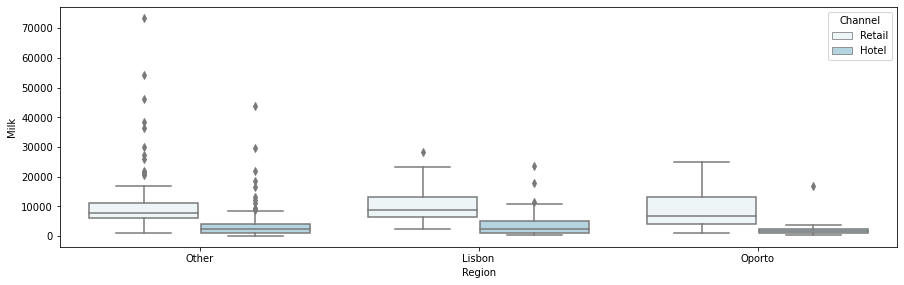

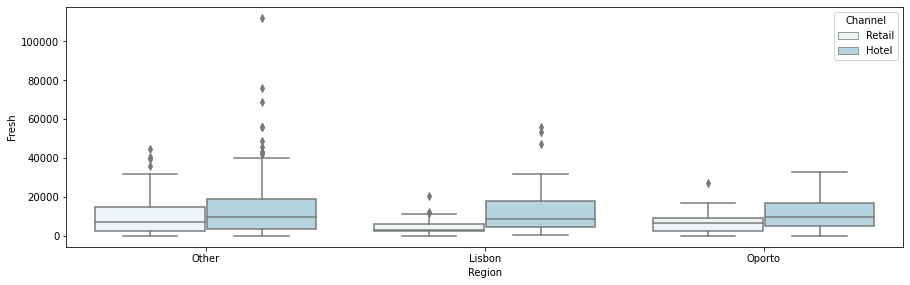

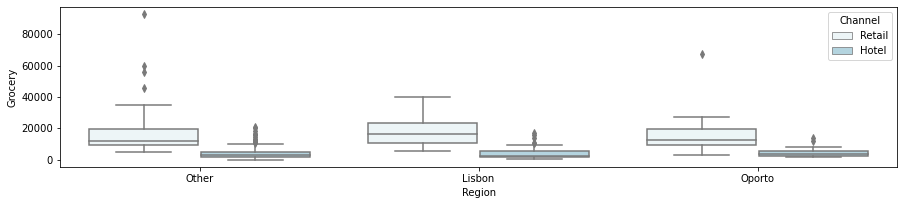

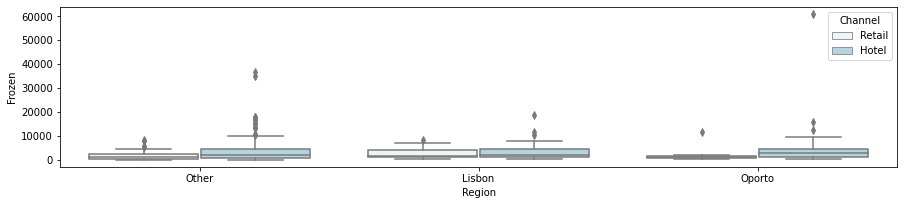

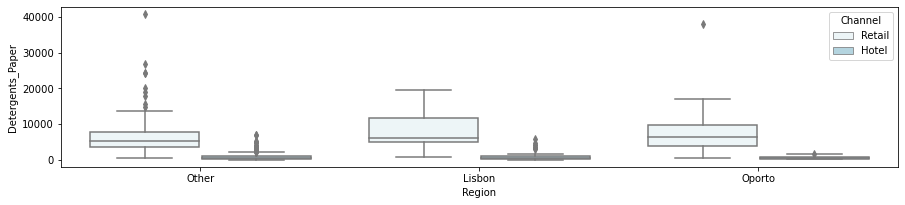

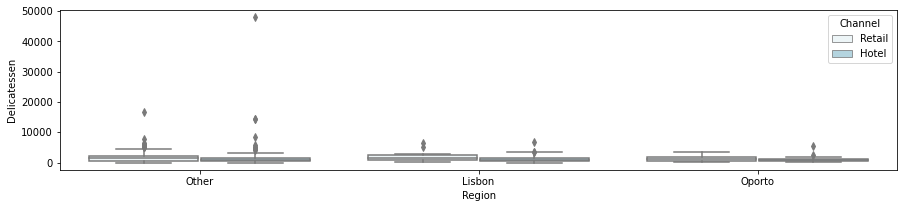

In [136]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Milk'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Fresh'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Grocery'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Frozen'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Detergents_Paper'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(y=Customerdata['Delicatessen'],x= Customerdata['Region'],hue=Customerdata['Channel'] ,color='lightblue')

plt.show()

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

As per the analysis,
1.Retailers should stock more milk across different regions and different sales channel. As that is consumed more when compared to other products. 
2.The wholesale customer data frame has a legit data, And it has outliers which are unusual values in a dataset. That needs to be removed for effective business decisions. 
3.Delicatessen is the item which has been sold least in all the regions, So Business decision can be made weather to increase or decrease the item. It gives a scope for decision making.

# PROBLEM 2 STATEMENT -
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [137]:
# Importing the CMU Survey dataset

Survey=pd.read_csv('Survey-1.csv')
Survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [138]:
Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


The data has 62 instances with 14 attributes. 6 integer type, 2 float type and 6 object type(Strings in the column)

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major


In [224]:
Major_Crosstab= pd.crosstab(Survey['Gender'], Survey['Major'], margins = True)  
print(Major_Crosstab) 

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7                   14          3   62  


2.1.2. Gender and Grad Intention

In [254]:
GradIntention_Crosstab= pd.crosstab(Survey['Gender'], Survey['Grad Intention'], margins = True)  
print(GradIntention_Crosstab) 

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62


2.1.3. Gender and Employment

In [226]:
Employment_Crosstab= pd.crosstab(Survey['Gender'], Survey['Employment'], margins = True)  
print(Employment_Crosstab) 

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62


2.1.4. Gender and Computer

In [225]:
Computer_Crosstab= pd.crosstab(Survey['Gender'], Survey['Computer'], margins = True)  
print(Computer_Crosstab) 

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?


In [164]:
Total_Population=62
Total_Male=29
Prob_Male = round(Total_Male/Total_Population,3)*100
print('Probability of randomly selected male is %1.1f' % Prob_Male +'%')

Probability of randomly selected male is 46.8%



2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [171]:
Total_Population=62
Total_Female=33
Prob_Female = round(Total_Female/Total_Population,3)*100
print('Probability of randomly selected female is %1.1f' % Prob_Female +'%')

Probability of randomly selected female is 53.2%


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.


In [188]:
#Using 2.1.1. Gender and Major crosstab table-

P_A_Male=round(4/29,3)*100 
print(P_A_Male)
P_C_Male=round(1/29,4)*100 
print(P_C_Male)
P_EF_Male=round(4/29,3)*100 
print(P_EF_Male)
P_IB_Male=round(2/29,3)*100 
print(P_IB_Male)
P_M_Male=round(6/29,3)*100 
print(P_M_Male)
P_O_Male=round(4/29,3)*100 
print(P_O_Male)
P_RM_Male=round(5/29,3)*100 
print(P_RM_Male)
P_U_Male=round(3/29,4)*100 
print(P_U_Male)


13.8
3.45
13.8
6.9
20.7
13.8
17.2
10.34



2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [195]:
#Using 2.1.1. Gender and Major crosstab table-

P_A_FeMale=round(3/33,3)*100 
print(P_A_FeMale)
P_C_FeMale=round(3/33,4)*100 
print(P_C_FeMale)
P_EF_FeMale=round(7/33,3)*100 
print(P_EF_FeMale)
P_IB_FeMale=round(4/33,3)*100 
print(P_IB_FeMale)
P_M_FeMale=round(4/33,3)*100 
print(P_M_FeMale)
P_O_FeMale=round(3/33,3)*100 
print(P_O_FeMale)
P_RM_FeMale=round(9/33,3)*100 
print(P_RM_FeMale)
P_U_FeMale=round(0/33,4)*100 
print(P_U_FeMale)

9.1
9.09
21.2
12.1
12.1
9.1
27.3
0.0


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.


In [199]:
#Using 2.1.2. Gender and Grad Intention crosstab table-

Male_Gradintend=17
Total_Grandintends=28
Prob_Male_Gradintend = round(Male_Gradintend/Total_Grandintends,3)*100
print('Probability of randomly selected male and intends to graduate is %1.1f' % Prob_Male_Gradintend +'%')

Probability of randomly selected male and intends to graduate is 60.7%


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [204]:
#Using 2.1.4. Gender and Computer crosstab table-

P_no_Laptop=4 #33-29=4
Total_Female=33
Female_no_laptop=round(P_no_Laptop/Total_Female,3)*100
print('Probability of randomly selected female and does not have laptop is %1.1f' % Female_no_laptop +'%')


Probability of randomly selected female and does not have laptop is 12.1%


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?


In [221]:
#Using 2.1.3. Gender and Employment crosstab table-

Prob_Male=29
Prob_fulltime=10
Prob_Male_and_Fulltime=7
Prob_either_Male_or_Fulltime=(Prob_Male+Prob_fulltime-Prob_Male_and_Fulltime)/62
print('Probability of randomly chosen student is either a male or has full-time  is %1.1f' % Prob_either_Male_or_Fulltime +'%')

Probability of randomly chosen student is either a male or has full-time  is 0.5%



2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [228]:
Major_Crosstab= pd.crosstab(Survey['Major'], Survey['Gender'], margins = True)  
print(Major_Crosstab) 

Gender                  Female  Male  All
Major                                    
Accounting                   3     4    7
CIS                          3     1    4
Economics/Finance            7     4   11
International Business       4     2    6
Management                   4     6   10
Other                        3     4    7
Retailing/Marketing          9     5   14
Undecided                    0     3    3
All                         33    29   62


In [241]:
# Using 2.1.1. Gender and Major crosstab table-

Prob_Female_InterBusiness=4/33
Prob_Female_Managment=4/33
Prob_Female_Business_or_managment=(Prob_Female_InterBusiness+Prob_Female_Managment)*100
print('Probability of randomly Female student in majoring Business or Managment is %1.1f' % Prob_Female_Business_or_managment +'%')


Probability of randomly Female student in majoring Business or Managment is 24.2%


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [313]:
GradIntention_Crosstab1=pd.crosstab(Survey['Grad Intention'],Survey['Gender'], margins = True)  
GradIntention_Crosstab1.rownames=["No","Yes"]
print(GradIntention_Crosstab1) 


Gender          Female  Male  All
Grad Intention                   
No                   9     3   12
Undecided           13     9   22
Yes                 11    17   28
All                 33    29   62


<ipython-input-313-3cf2645d6e6e>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  GradIntention_Crosstab1.rownames=["No","Yes"]


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [283]:
#Total no.of student whose GPA is less than 3 is 17
#And total.no of students are =62

Prb_Lessthan_3= 17/62
Prb_Lessthan_3

0.27419354838709675

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [285]:
Computer_Crosstab= pd.crosstab(Survey['Salary'], Survey['Gender'], margins = True)  
print(Computer_Crosstab) 

Gender  Female  Male  All
Salary                   
25.0         0     1    1
30.0         5     0    5
35.0         1     1    2
37.0         0     1    1
37.5         1     0    1
40.0         5     7   12
42.0         1     0    1
45.0         1     4    5
47.0         0     1    1
47.5         1     0    1
50.0         5     4    9
52.0         0     1    1
54.0         0     1    1
55.0         5     3    8
60.0         5     3    8
65.0         0     1    1
70.0         1     0    1
78.0         1     0    1
80.0         1     1    2
All         33    29   62


In [295]:
#Total no of male student earning more than 50 = 14
#Total no of male student=29
Prob_male_50_or_more=(14/29)
Prob_male_50_or_more

0.4827586206896552

In [296]:
#Total no of Female student earning more than 50 = 18
#Total no of Female student=33
Prob_male_50_or_more=(18/33)
Prob_male_50_or_more

0.5454545454545454

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

1. Left skewed unimodel
2. the shape is symmetrical, then the mean, median, and mode are all the same value. It looks like a normally distributed data 
3. Rightskewed unimodel,This shape indicates that there are a number of data points, perhaps outliers, that are greater than the mode.
4. Rightskewed unimodel,This shape indicates that there are a number of data points, perhaps outliers.

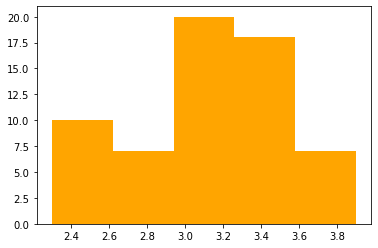

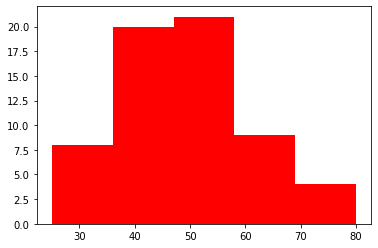

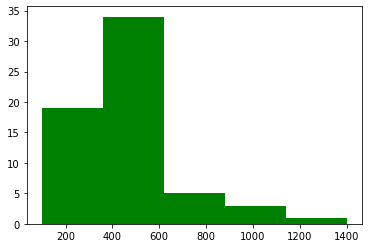

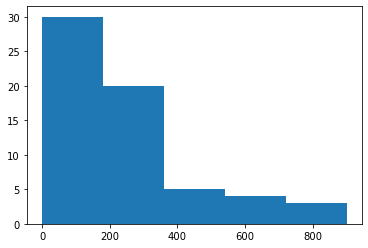

In [305]:
plt.hist(Survey['GPA'],color='orange',bins=5)
plt.show()

plt.hist(Survey['Salary'],color='Red',bins=5)
plt.show()

plt.hist(Survey['Spending'],color='Green',bins=5)
plt.show()

plt.hist(Survey['Text Messages'],bins=5)
plt.show()

# ProbleM 3 Statement-

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

For A--

Stating HO AND HA value
H0<=0.35
HA>0.35

Alpha=0.05 

Xbar-samplemean=	0.316666667
sample standard deviation=	0.135730826
samplesize, n=	36
Hypothesized mean	5.7

one sample t test=285 

P=TDIST(t,n-1,2)
P=1.67973E-60

pvalue<Alpha(0.05) -- Reject H0



In [ ]:
For B--

Stating HO AND HA value
H0<=0.35
HA>0.35

Alpha=0.05 

Xbar-samplemean=	0.273548387
sample standard deviation=	0.137296477
samplesize, n=	31
Hypothesized mean	4.42

one sample t test=153

P=TDIST(t,n-1,2)
P=5.85807E-45

pvalue<Alpha(0.05) -- Reject H0


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Statistical conclusion based on the p value, both A and B shingles has the exponential value with is less that the null value.
Hence we rejected the null hypothesis.

